# Programming Machine Learning Lab


#### Exercise 1.1


In this part of the assignment, you have to write a word count program. Your program should read the provided text document on learnweb named __random text.txt__ and then output the following stats:

1. The number of unique non-stop words. (Hint: you can use ”nltk” library to get a list of English language stop words.)
1. The top 5 most frequent non-stop words (along with the number of occurances).
1. Compute the letter frequency (number of times each letter is present) from the whole document and plot it.



Number Of Unique Non-stop Words Is:  356
Top 5 Most Frequent Non-stop Words:
harry : 30
voldemort : 13
also : 8
dark : 7
school : 6


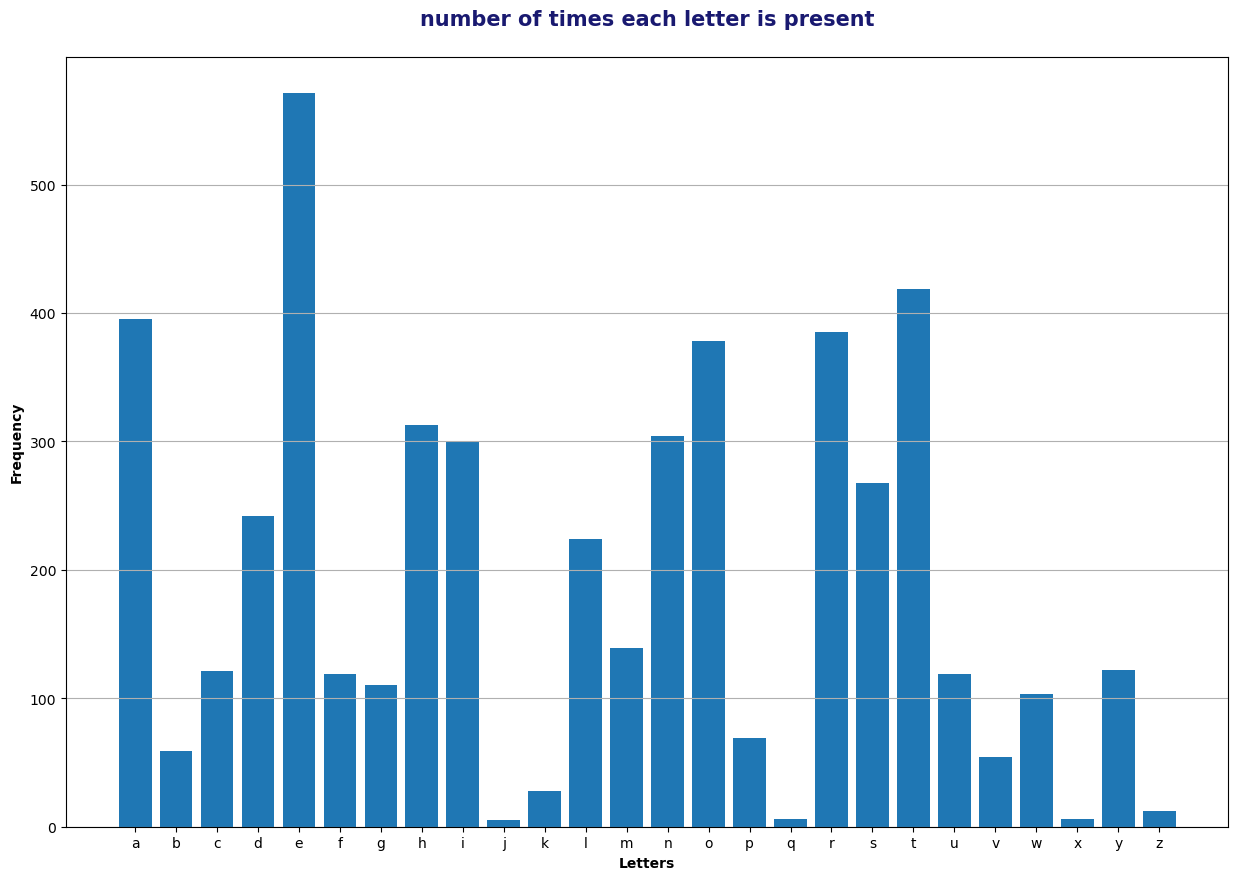

In [38]:
# Import Libraries
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
import numpy as np
import string
#read text file
with open('random_text.txt','r') as file:
    text = file.read()
stop_words = set(stopwords.words('english')) #stop words in English
stop_words_w_punct = stop_words.union(set(punctuation)) #make a list of punctuation and union it with stop words in English
words=nltk.tokenize.word_tokenize(text.lower()) #split text to words

# list of words that are letters
words = [word for word in words if word.isalpha()] #check if all the characters in a specific words are letters 

    
filtered_text = [w for w in words if not w in stop_words_w_punct] #List of words that are not stop words and punctuation

#Q1
#number of unique words
num_unique_words =len(np.unique(filtered_text))
print('Number Of Unique Non-stop Words Is: ',num_unique_words)

#Q2
# Top 5 most frequent words
print('Top 5 Most Frequent Non-stop Words:')
freq= Counter(filtered_text).most_common(5)
for i in range(5):
    word,word_freq= freq[i]  # Unpack the word and its frequency from the tuple
    print(f'{word} : {word_freq}')

    
#Q3
letters ='abcdefghijklmnopqrstuvwxyz'
letters_dictionary = {letter: 0 for letter in letters} #create a dictionary of letters with value of 0 for each letter

#count each letters in text and the result store in letters_dictionary
for char in text.lower():
    if char in letters:
        letters_dictionary[char]+=1
letters_dictionary

letter = list(letters_dictionary.keys())
frq=list(letters_dictionary.values())

#bar plot
plt.figure(figsize=(15,10))

plt.bar(letter,frq)

plt.title('number of times each letter is present\n',fontsize=15,color='#191970',weight='bold')
plt.xlabel('Letters',weight='bold',fontsize=10)
plt.ylabel('Frequency',weight='bold',fontsize=10)
plt.grid(axis='y')
plt.show()

#### Exercise 1.2


In a simple regression problem we fit a straight line $y = mx+b$ to a given data. However, not all problems in nature are by default linear. Given the data below see if a straight line is a good fit.


| x | 0.0 | 0.5  | 1.0 | 1.5  | 2.0  | 2.5  | 3.0  | 3.5  | 4.0  | 4.5  | 5.0  |
|---|-----|------|-----|------|------|------|------|------|------|------|------|
| y | 6.0 | 4.83 | 3.7 | 3.15 | 2.41 | 1.83 | 1.49 | 1.21 | 0.96 | 0.73 | 0.64 |

In cases where the data does not follow a linear trend, one can transform the variables and then apply the  linear regression technique to better fit the data. 

Generate a 2 x 2 subplot with the following techniques, plot, semilogx, semilogy, loglog. Read about these plotting techniques. These plots will let you understand which of the below 5 choices will be the best fit. Plot the data points and the best fit curve in a well-formatted plot with axis labels, title and the legend. From the given choices, try which function would be a better representation for the data.

1.  Linear : $y=mx+b$
1.  Power : $y = bx^m$
1.  Exponential : $y = be^{mx}$
1.  Logarithmic : $y = m \times \text{log}x + b$
1.  Reciprocal : $y = \frac{1}{mx+b}$

**(Hint: you can use the polyfit function from numpy for this part.)**

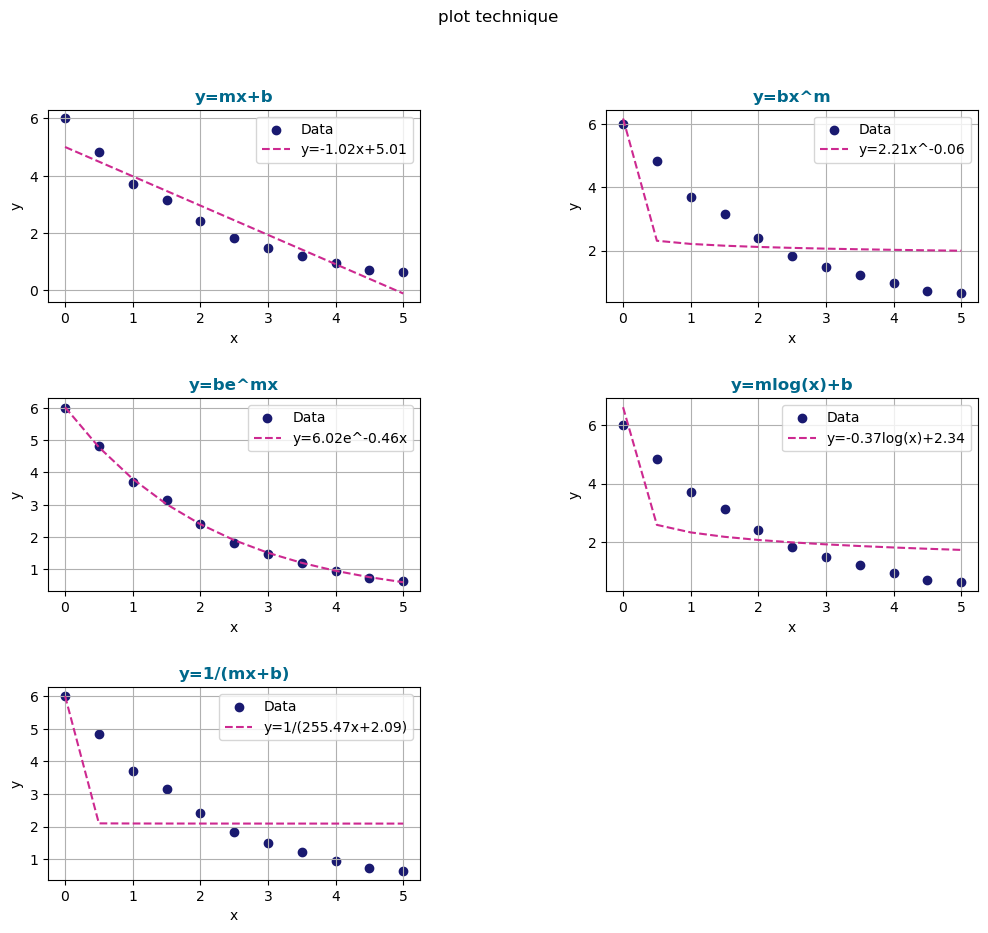

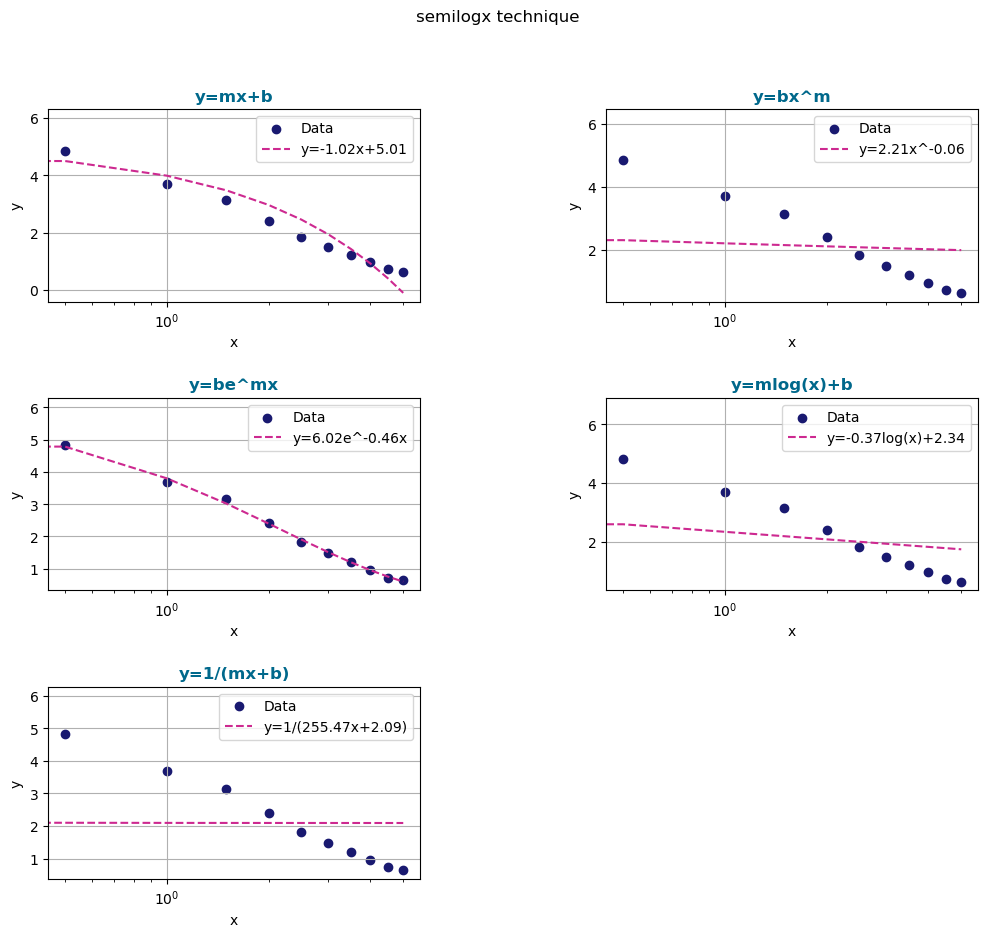

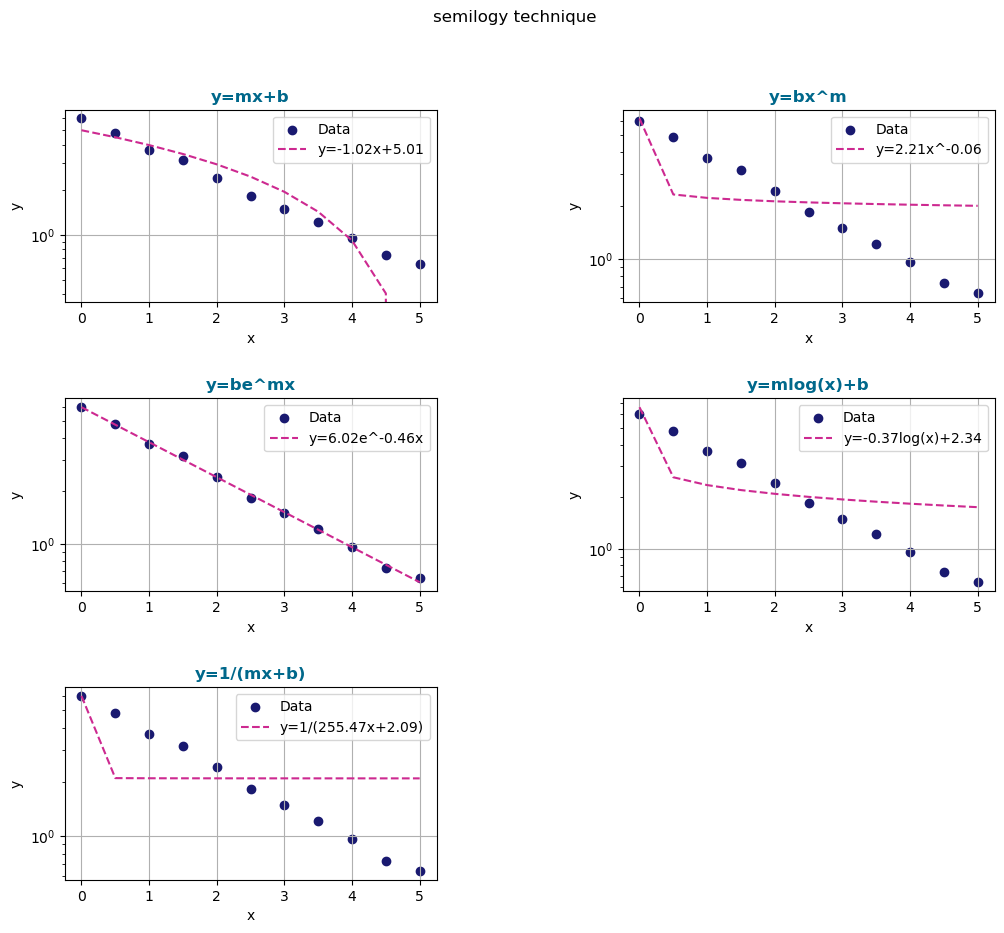

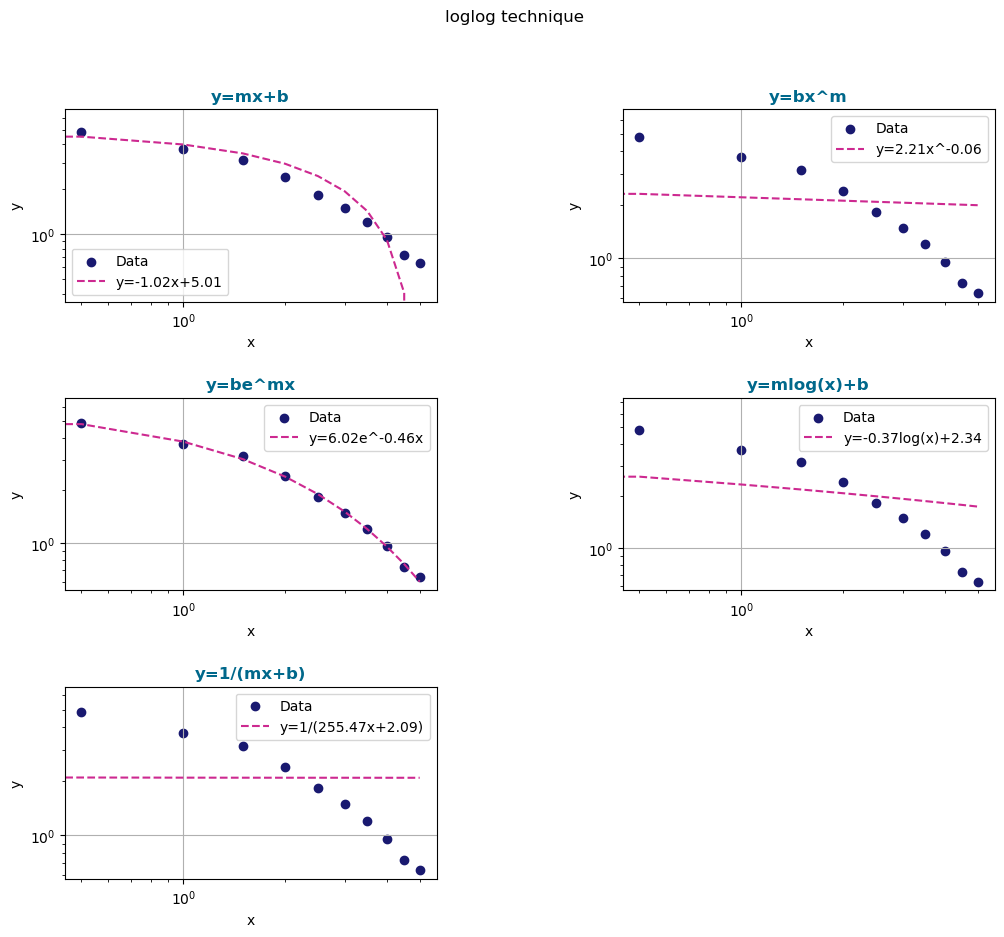

 As we can observe when plotting various functions using 'plot,' 'semilogx,' 'semilogy,' and 'loglog,' the exponential function appears to be the most suitable fit for the data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Given data
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([6.0, 4.83, 3.7, 3.15, 2.41, 1.83, 1.49, 1.21, 0.96, 0.73, 0.64])

# Define the functions for the five choices
def linear(x, m, b):
    return m * x + b

def power(x, b, m):
    return b * (x+0.0000001)**m

def exponential(x, b, m):
    return b * np.exp(m * x)

def logarithmic(x, m, b):
    return m * np.log(x+0.00001) + b

def reciprocal(x, m, b):
    return 1 / (m * (x+0.001)) + b

#thecnique plot 
#creat a subplot (3,2) for five function
plot = plt.figure(figsize = (12, 10))
plot.suptitle("plot technique")
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1,6):
    a = plot.add_subplot(3, 2, i)
    a.scatter(x,y,color='#191970',label='Data')
    plt.grid()
    plt.legend()
#plot linear function 
plt.subplot(3, 2, 1)
param,param_cov  = curve_fit(linear, x, y)
plt.plot(x, linear(x,*param), '--', color ='#CD2990',label=f"y={param[0]:.2f}x+{param[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+b',fontweight='bold',color='#00688B')
plt.legend()
#plot power function
plt.subplot(3,2,2)
param_pow,param_cov_pow  = curve_fit(power, x, y)
plt.plot(x, power(x,*param_pow), '--', color ='#CD2990',label=f"y={param_pow[0]:.2f}x^{param_pow[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=bx^m',fontweight='bold',color='#00688B')
plt.legend()

#plot exponential function
plt.subplot(3,2,3)
param_exp,param_cov_exp  = curve_fit(exponential, x, y)
plt.plot(x, exponential(x,*param_exp), '--', color ='#CD2990',label=f"y={param_exp[0]:.2f}e^{param_exp[1]:.2f}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=be^mx',fontweight='bold',color='#00688B')
plt.legend()

#plot logarithmic function
plt.subplot(3,2,4)
param_log,param_cov_log  = curve_fit(logarithmic, x, y)
plt.plot(x, logarithmic(x,*param_log), '--', color ='#CD2990',label=f"y={param_log[0]:.2f}log(x)+{param_log[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mlog(x)+b',fontweight='bold',color='#00688B')
plt.legend()

#plot reciprocal function
plt.subplot(3,2,5)
param_rec,param_cov_rec  = curve_fit(reciprocal, x, y)
plt.plot(x, reciprocal(x,*param_rec), '--', color ='#CD2990',label=f"y=1/({param_rec[0]:.2f}x+{param_rec[1]:.2f})")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=1/(mx+b)',fontweight='bold',color='#00688B')
plt.legend()
plt.show()

#thecnique semilogx 
#creat a subplot (3,2) for five function
plot = plt.figure(figsize = (12, 10))
plot.suptitle("semilogx technique")
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1,6):
    a = plot.add_subplot(3, 2, i)
    a.scatter(x,y,color='#191970',label='Data')
    plt.grid()
    plt.legend()
#plot linear function 
plt.subplot(3, 2, 1)
param,param_cov  = curve_fit(linear, x, y)
plt.semilogx(x, linear(x,*param), '--', color ='#CD2990',label=f"y={param[0]:.2f}x+{param[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+b',fontweight='bold',color='#00688B')
plt.legend()
#plot power function
plt.subplot(3,2,2)
param_pow,param_cov_pow  = curve_fit(power, x, y)
plt.semilogx(x, power(x,*param_pow), '--', color ='#CD2990',label=f"y={param_pow[0]:.2f}x^{param_pow[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=bx^m',fontweight='bold',color='#00688B')
plt.legend()

#plot exponential function
plt.subplot(3,2,3)
param_exp,param_cov_exp  = curve_fit(exponential, x, y)
plt.semilogx(x, exponential(x,*param_exp), '--', color ='#CD2990',label=f"y={param_exp[0]:.2f}e^{param_exp[1]:.2f}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=be^mx',fontweight='bold',color='#00688B')
plt.legend()

#plot logarithmic function
plt.subplot(3,2,4)
param_log,param_cov_log  = curve_fit(logarithmic, x, y)
plt.semilogx(x, logarithmic(x,*param_log), '--', color ='#CD2990',label=f"y={param_log[0]:.2f}log(x)+{param_log[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mlog(x)+b',fontweight='bold',color='#00688B')
plt.legend()

#plot reciprocal function
plt.subplot(3,2,5)
param_rec,param_cov_rec  = curve_fit(reciprocal, x, y)
plt.semilogx(x, reciprocal(x,*param_rec), '--', color ='#CD2990',label=f"y=1/({param_rec[0]:.2f}x+{param_rec[1]:.2f})")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=1/(mx+b)',fontweight='bold',color='#00688B')
plt.legend()
plt.show()


#thecnique semilogy 
#creat a subplot (3,2) for five function
plot = plt.figure(figsize = (12, 10))
plot.suptitle("semilogy technique")
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1,6):
    a = plot.add_subplot(3, 2, i)
    a.scatter(x,y,color='#191970',label='Data')
    plt.grid()
    plt.legend()
#plot linear function 
plt.subplot(3, 2, 1)
param,param_cov  = curve_fit(linear, x, y)
plt.semilogy(x, linear(x,*param), '--', color ='#CD2990',label=f"y={param[0]:.2f}x+{param[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+b',fontweight='bold',color='#00688B')
plt.legend()
#plot power function
plt.subplot(3,2,2)
param_pow,param_cov_pow  = curve_fit(power, x, y)
plt.semilogy(x, power(x,*param_pow), '--', color ='#CD2990',label=f"y={param_pow[0]:.2f}x^{param_pow[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=bx^m',fontweight='bold',color='#00688B')
plt.legend()

#plot exponential function
plt.subplot(3,2,3)
param_exp,param_cov_exp  = curve_fit(exponential, x, y)
plt.semilogy(x, exponential(x,*param_exp), '--', color ='#CD2990',label=f"y={param_exp[0]:.2f}e^{param_exp[1]:.2f}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=be^mx',fontweight='bold',color='#00688B')
plt.legend()

#plot logarithmic function
plt.subplot(3,2,4)
param_log,param_cov_log  = curve_fit(logarithmic, x, y)
plt.semilogy(x, logarithmic(x,*param_log), '--', color ='#CD2990',label=f"y={param_log[0]:.2f}log(x)+{param_log[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mlog(x)+b',fontweight='bold',color='#00688B')
plt.legend()

#plot reciprocal function
plt.subplot(3,2,5)
param_rec,param_cov_rec  = curve_fit(reciprocal, x, y)
plt.semilogy(x, reciprocal(x,*param_rec), '--', color ='#CD2990',label=f"y=1/({param_rec[0]:.2f}x+{param_rec[1]:.2f})")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=1/(mx+b)',fontweight='bold',color='#00688B')
plt.legend()
plt.show()

#thecnique loglog 
#creat a subplot (3,2) for five function
plot = plt.figure(figsize = (12, 10))
plot.suptitle("loglog technique")
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1,6):
    a = plot.add_subplot(3, 2, i)
    a.scatter(x,y,color='#191970',label='Data')
    plt.grid()
    plt.legend()
#plot linear function 
plt.subplot(3, 2, 1)
param,param_cov  = curve_fit(linear, x, y)
plt.loglog(x, linear(x,*param), '--', color ='#CD2990',label=f"y={param[0]:.2f}x+{param[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mx+b',fontweight='bold',color='#00688B')
plt.legend()
#plot power function
plt.subplot(3,2,2)
param_pow,param_cov_pow  = curve_fit(power, x, y)
plt.loglog(x, power(x,*param_pow), '--', color ='#CD2990',label=f"y={param_pow[0]:.2f}x^{param_pow[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=bx^m',fontweight='bold',color='#00688B')
plt.legend()

#plot exponential function
plt.subplot(3,2,3)
param_exp,param_cov_exp  = curve_fit(exponential, x, y)
plt.loglog(x, exponential(x,*param_exp), '--', color ='#CD2990',label=f"y={param_exp[0]:.2f}e^{param_exp[1]:.2f}x")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=be^mx',fontweight='bold',color='#00688B')
plt.legend()

#plot logarithmic function
plt.subplot(3,2,4)
param_log,param_cov_log  = curve_fit(logarithmic, x, y)
plt.loglog(x, logarithmic(x,*param_log), '--', color ='#CD2990',label=f"y={param_log[0]:.2f}log(x)+{param_log[1]:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=mlog(x)+b',fontweight='bold',color='#00688B')
plt.legend()

#plot reciprocal function
plt.subplot(3,2,5)
param_rec,param_cov_rec  = curve_fit(reciprocal, x, y)
plt.loglog(x, reciprocal(x,*param_rec), '--', color ='#CD2990',label=f"y=1/({param_rec[0]:.2f}x+{param_rec[1]:.2f})")
plt.xlabel('x')
plt.ylabel('y')
plt.title('y=1/(mx+b)',fontweight='bold',color='#00688B')
plt.legend()
plt.show()


print("\033[1m As we can observe when plotting various functions using 'plot,' 'semilogx,' 'semilogy,' and 'loglog,' the exponential function appears to be the most suitable fit for the data.\033[0m")

#### Exercise 1.3



In this part of the task, you will implement the linear regression from scratch. The task is to have a user-defined function that will fit data points to a linear function of the form $y=mx+b$. The function will be named ${liner\_fit(x,y)}$. It accepts 2 arguments $x$ and $y$ and must return the coefficients $b,m$ which are the constants of the fitted equation. Use your function on the data below and generate a plot that shows the data points and also the fitted function.

| x | -0.1 | 0.7  | 1.6  | 3.2  | 4.1  | 5.2 | 6.4  | 6.6 | 7.7 | 8.5 | 10.2 | 10.7 | 12.2 | 12.8 |
|---|------|------|------|------|------|-----|------|-----|-----|-----|------|------|------|------|
| y | -0.9 | -1.4 | -1.1 | -0.7 | -0.2 | 0.0 | -0.2 | 0.1 | 0.9 | 1.0 | 0.9  | 1.4  | 1.3  | 1.6  |

You are required to implement the algorithm below for the task.

**Inputs** $x$ and $y$ as 1-D vectors

**Output** Compute $b,m$ for fitted equation

learn-simple-linreg($x, y$): <br>
1. $\bar x := \frac{1}{N} \sum_{n=1}^N x_n$  <br>
1. $\bar y := \frac{1}{N} \sum_{n=1}^N y_n$  <br>
1. $\hat\beta_1 := \frac{ \sum_{n=1}^N (x_n-\bar x)(y_n-\bar y) }{ \sum_{n=1}^N (x_n-\bar x)^2 }$  <br>
1. $\hat\beta_0 := \bar y - \hat\beta_1 \bar x $  <br>
1. $return (\hat\beta_0, \hat\beta_1)$  <br>




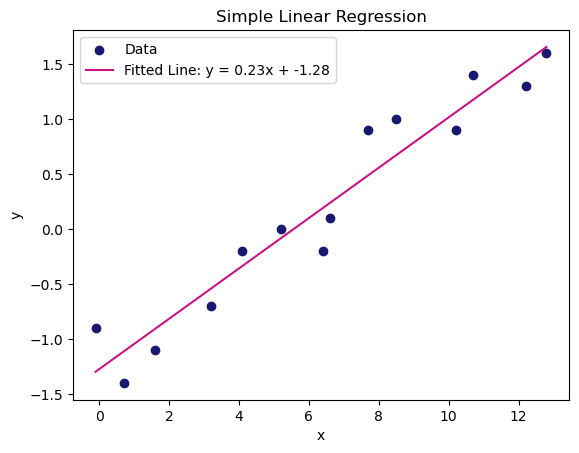

Coefficient b (intercept): -1.28
Coefficient m (slope): 0.23
The fitted function is: y = 0.23x + -1.28


In [40]:
import numpy as np

# define function Linear_fit
def linear_fit(x,y):
    # Calculate the means of x and y
    x_mean = np.mean(x)
    y_mean =np.mean(y)
    
    # Calculate the coefficients beta1 (m) and beta0 (b)
    beta1= sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
    beta0= y_mean - beta1* x_mean
    
    return beta0,beta1

#Data
x = np.array([-0.1,0.7,1.6,3.2,4.1,5.2,6.4,6.6,7.7,8.5,10.2, 10.7, 12.2, 12.8])
y =np.array([-0.9,-1.4,-1.1,-0.7,-0.2,0.0,-0.2,0.1,0.9,1.0,0.9,1.4,1.3,1.6])

# Calculate coefficients for Data
b , m =linear_fit(x,y)

# Generate the fitted line
fitted_line = m * x + b

# Plot the data and the fitted line
plt.scatter(x, y,color='#191970', label="Data")
plt.plot(x, fitted_line, color='#C71585', label=f"Fitted Line: y = {m:.2f}x + {b:.2f}")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

print(f"Coefficient b (intercept): {b:.2f}")
print(f"Coefficient m (slope): {m:.2f}")
print(f"The fitted function is: y = {m:.2f}x + {b:.2f}")

#### Exercise 1.4



In this part of the assignment, we will explore the 3D plotting capabilities in Python. Specifically, we will generate a 3D plot of an ice cream cone. The cone is 8 inches tall and has a base diameter of 4 inch. Furthermore, the top of the ice-cream is a hemisphere of 4-inch diameter. We define the following parametric equations for the cone: $$x = r\:cos\theta, y = r\: sin\theta, z = 4r$$ 
with $\theta \in [0, 2\pi]$ and $r \in [0, 2]$
  
  
Also, for the top of ice-cream which is hemisphere, the equations are: $$x = r\: cos\theta\: sin\phi, y = r\: sin\theta \:sin\phi, z = 8+r\: cos\phi$$  with $\theta \in [0, 2\pi]$ and $\phi \in [0, \pi]$ 

Generate the 3D mesh plot for the ice-cream cone described by the equations. You are required to properly format the plot with axis labels, titles and grid. Specifically, you are required to learn how to produce well-formatted plots with symbols and latex formatting in the title and label. A poor formatting of plot will be penalized. Use __numpy__ for all computations.

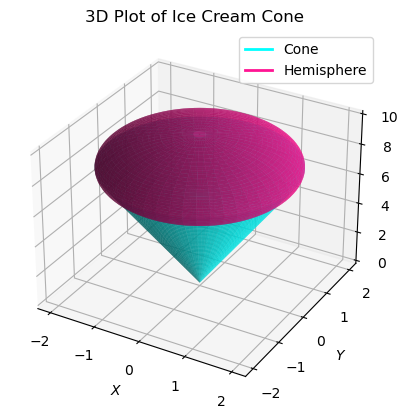

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from matplotlib.lines import Line2D

# Define the parametric equations for the cone

theta = np.linspace(0,2*np.pi,100)
r_cone=np.linspace(0,2,100)
r_cone,theta = np.meshgrid(r_cone,theta)
x_cone = r_cone*np.cos(theta)
y_cone = r_cone*np.sin(theta)
z_cone=4*r_cone



# Define the parametric equations for the hemisphere
phi = np.linspace(0,np.pi,100)
theta,phi = np.meshgrid(theta,phi)
R_hemi = 2
x_hemi = R_hemi*np.cos(theta)*np.sin(phi)
y_hemi =R_hemi*np.sin(theta)*np.sin(phi)
z_hemi =8 +R_hemi*np.cos(phi)

# Plot the cone and hemisphere

ax=plt.axes(projection='3d')
ax.plot_surface(x_cone,y_cone,z_cone,alpha=0.7,color="#00FFFF",label="cone")
ax.plot_surface(x_hemi,y_hemi,z_hemi,alpha=0.7,color="#FF1493",label="hemisphere")

# Customize the plot with labels and titles
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.set_title('3D Plot of Ice Cream Cone')

# Create a custom legend
legend_elements = [Line2D([0], [0], color='#00FFFF', lw=2, label='Cone'),
                   Line2D([0], [0], color='#FF1493', lw=2, label='Hemisphere')]
ax.legend(handles=legend_elements)

# Add a grid
ax.grid(True)

plt.show()

#### Exercise 1.5

In this task you are required to explore a real-world dataset from the airport dataset named __task1.txt__. You are required to the following:
- Load the dataset using pandas and display all necessary information contained in the file.
- You are tasked as a data scientist to create a story that is visually appealing from this data. Create plots using __matplotlib/seaborn__ that will depict such interesting stories from flights that depart from and arrive in the Austin region. The figures should be annotated properly and also easily understandable on the first glance. A list of questions that can be explored/answered as reference are given below. Of course, you are free to explore any other possibilities.
    - Investigate what time of the day it is best to fly so as to have the least possible delays. Does this change with airlines?
    - Investigate what time of the year it is more suited to fly so as to have the delays minimum and does the destination affect this? You can lay insights on some popular destinations for the task.
    - Explore some airports that are bad to fly to. Does the time of day or year affect this?
    - Investigate on how the pattern of flights to various destinations alter over the course of year.

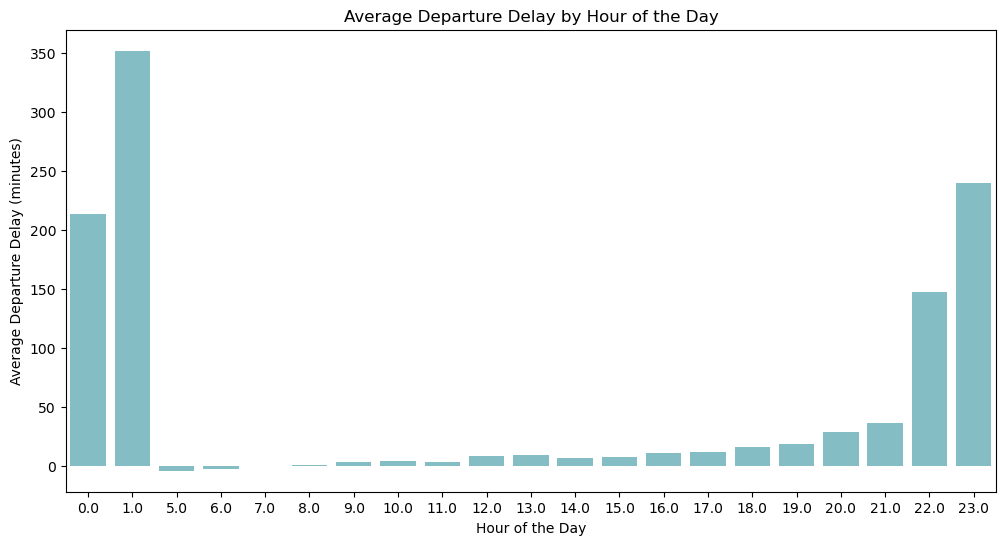


 **As we can see in the bar plot at 7:00 is the best time of day to fly 
----------------------------------------------------------------------------------------------------


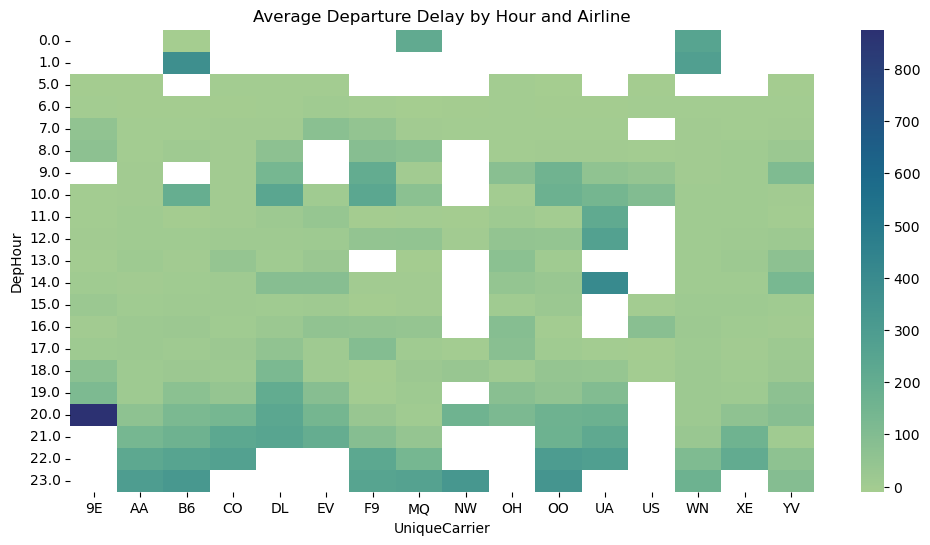


 **In the heatmap, we can observe that the choice of airline can significantly impact the optimal time for flying.
 For instance, at 20:00, airline 9E experiences the most delays, whereas other airlines exhibit shorter delays during this timeframe.
----------------------------------------------------------------------------------------------------


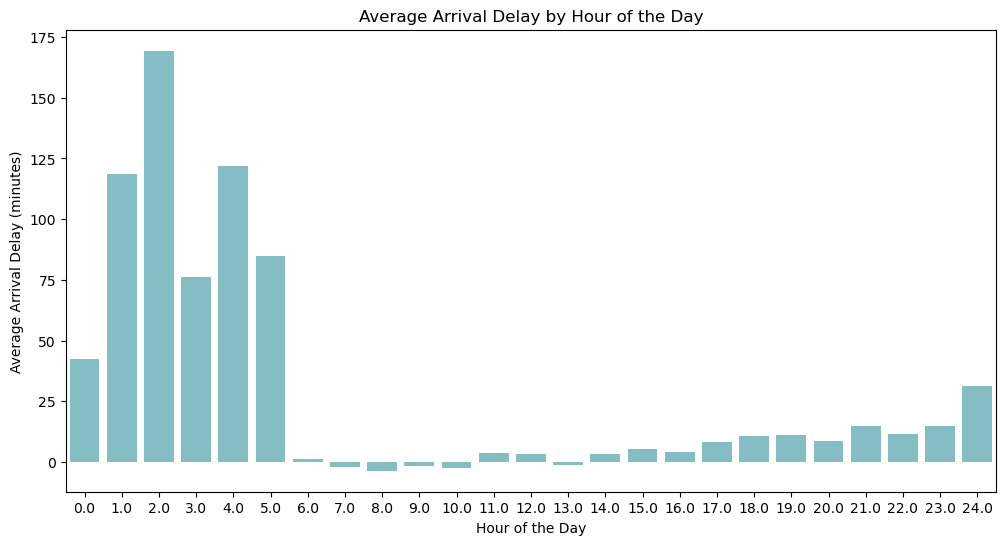


 **In the bar plot, it's evident that there are no arrival delays between 7:00 and 10:00. 
----------------------------------------------------------------------------------------------------


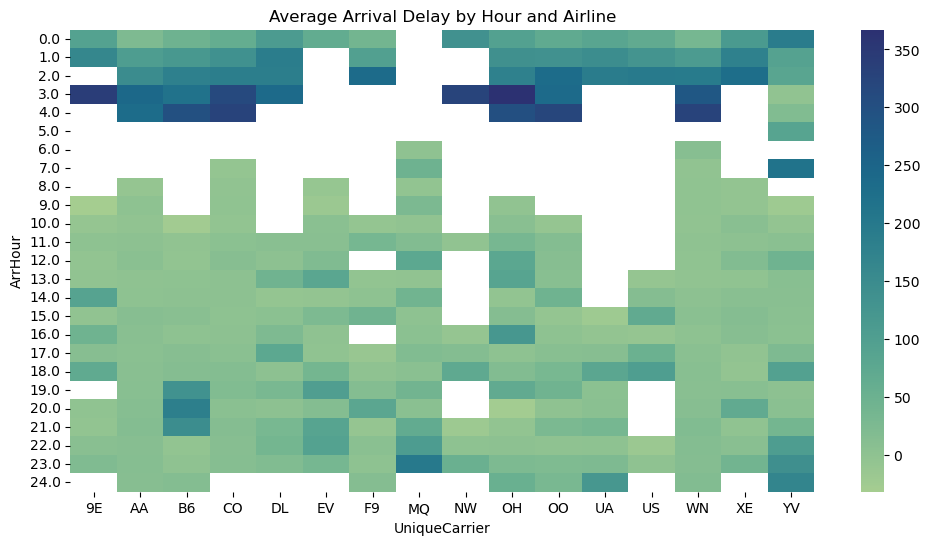


 **In the heatmap, we can observe that the choice of airline can significantly impact the optimal arrival time.
 For instance, at 23:00, some airlines experience more Arrdelays, whereas other airlines exhibit shorter delays during this timeframe.
----------------------------------------------------------------------------------------------------


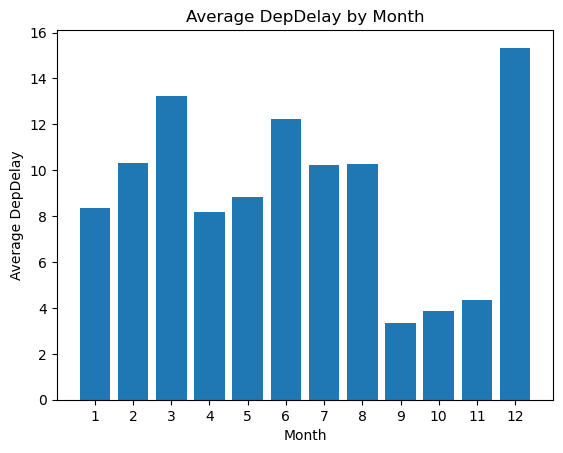


 **In the bar plot, it's evident that September (month 9) is the most favorable time of the year to fly with the least delays. 
----------------------------------------------------------------------------------------------------


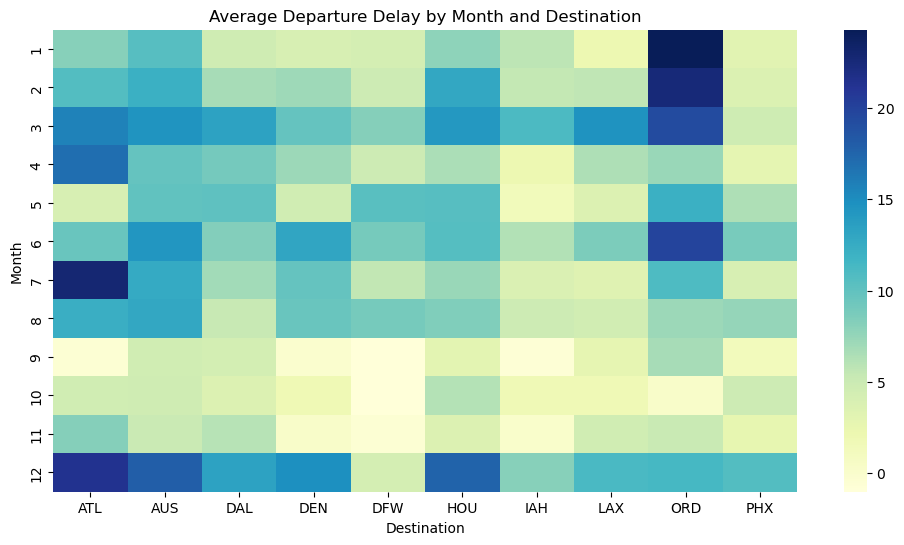


 *In the heatmap, we can observe that the choice of Destination can influence the best month to fly. For instance, in month 7, Destination ATL experienced the most delays, while other Destination had fewer delays.*
----------------------------------------------------------------------------------------------------


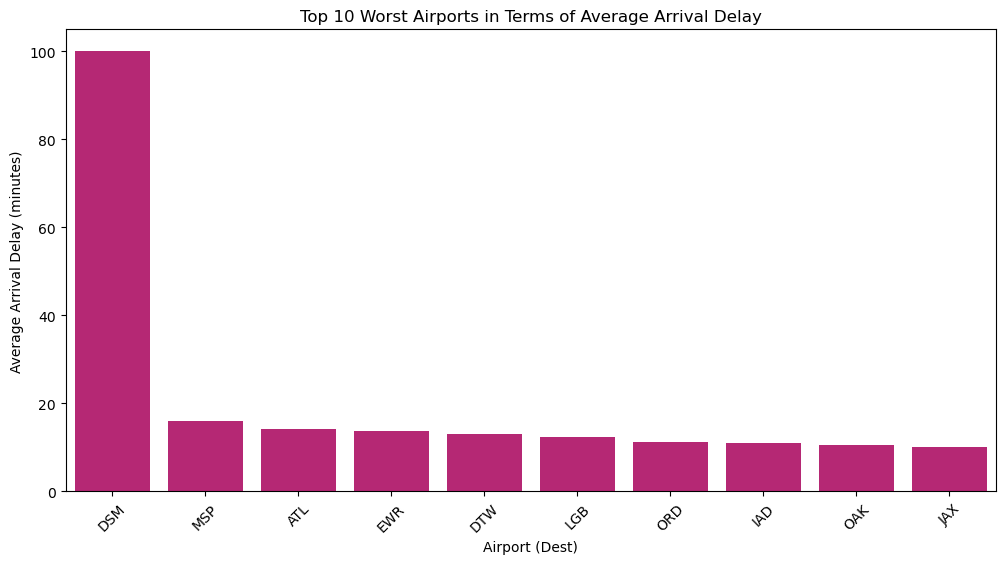

----------------------------------------------------------------------------------------------------


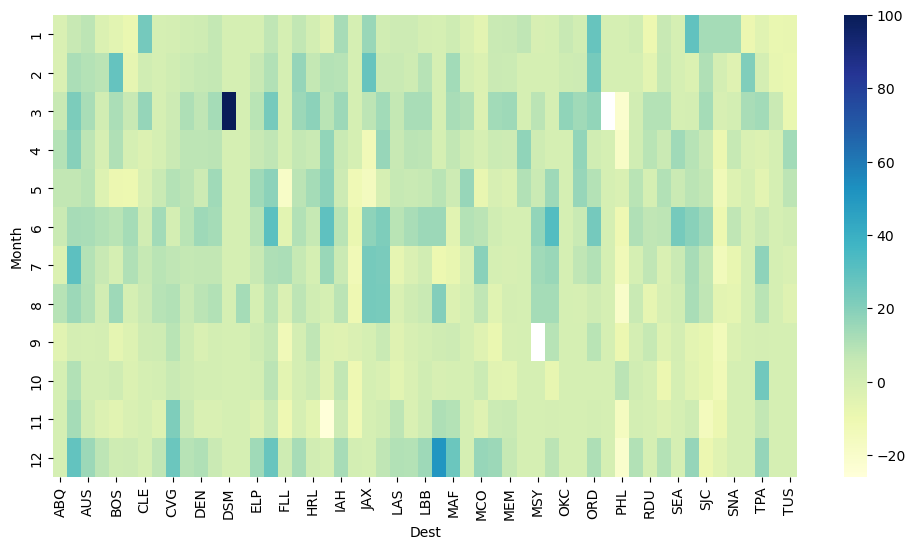


 **In the heatmap, it's evident that the time of the year can impact the average Arrival Delay. For instance, Airport DSM generally experiences fewer delays throughout the year, but in month 3, it encounters the highest delay.
----------------------------------------------------------------------------------------------------


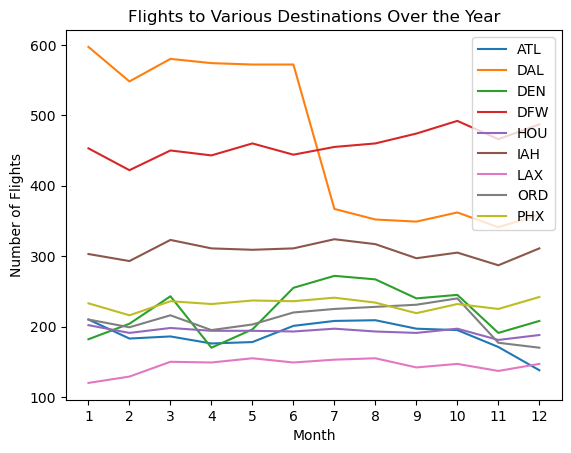

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Load the dataset
task1= pd.read_table("task1.txt",sep=",")
#Q1
# extract the  hour from depature time 
task1['DepHour']=task1['DepTime']//100

#extract data with orgin of Austin
df_Origin_AUS = task1.loc[(task1['Origin']=='AUS'),:]

# Group the data by the DepHour and calculate the average DepDelay for each hour
avg_delay_by_hour = df_Origin_AUS.groupby(['DepHour'])['DepDelay'].mean()
avg_delay_by_hour

#bar plot average departure delay by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_hour.index, y=avg_delay_by_hour.values,color="#7AC5CD")
plt.title('Average Departure Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()
print("\n\033[1m **As we can see in the bar plot at 7:00 is the best time of day to fly \033[0m" )
print('-'*100)
#average Depature delay by airline

# Group the data by Airline and calculate the average DepDelay for each Airline
avg_dep_delay_by_airline=df_Origin_AUS.groupby(['DepHour','UniqueCarrier'])['DepDelay'].mean()

# Plot average delay by airline
plt.figure(figsize=(12, 6))
sns.heatmap(avg_dep_delay_by_airline.unstack(), cmap='crest')
plt.title('Average Departure Delay by Hour and Airline')
plt.show()
print("\n\033[1m **In the heatmap, we can observe that the choice of airline can significantly impact the optimal time for flying.\n For instance, at 20:00, airline 9E experiences the most delays, whereas other airlines exhibit shorter delays during this timeframe.\033[0m" )
print('-'*100)
# extract the  hour from arrival time 
task1['ArrHour']=task1['ArrTime']//100

#extract data with destination of Austin
df_dest_AUS = task1.loc[(task1['Dest']=='AUS'),:]

# Group the data by the ArrHour and calculate the average ArrDelay for each hour
avg_arr_delay_by_hour = df_dest_AUS.groupby(['ArrHour'])['ArrDelay'].mean()
avg_arr_delay_by_hour
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_arr_delay_by_hour.index, y=avg_arr_delay_by_hour.values,color="#7AC5CD")
plt.title('Average Arrival Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay (minutes)')
plt.show()
print("\n\033[1m **In the bar plot, it's evident that there are no arrival delays between 7:00 and 10:00. \033[0m" )
print('-'*100)

# Group the data by Airline and calculate the average ArrDelay for each Airline
avg_arr_delay_by_airline = df_dest_AUS.groupby(['ArrHour','UniqueCarrier'])['ArrDelay'].mean()
avg_arr_delay_by_airline

plt.figure(figsize=(12, 6))
sns.heatmap(avg_arr_delay_by_airline.unstack(), cmap='crest')
plt.title('Average Arrival Delay by Hour and Airline')
plt.show()
print("\n\033[1m **In the heatmap, we can observe that the choice of airline can significantly impact the optimal arrival time.\n For instance, at 23:00, some airlines experience more Arrdelays, whereas other airlines exhibit shorter delays during this timeframe.\033[0m" )
print('-'*100)
#Q2 
#what time of the year it is more suited to fly
avg_dep_delay_by_month=task1.groupby(['Month'])['DepDelay'].mean()
avg_dep_delay_by_month = avg_dep_delay_by_month.to_frame()
plt.bar(x= avg_dep_delay_by_month.index.tolist(),height=avg_dep_delay_by_month['DepDelay'])
plt.xlabel("Month")
plt.ylabel("Average DepDelay")
plt.title("Average DepDelay by Month")
plt.xticks(ticks=np.linspace(1,12,12,dtype=int))
plt.show()
print("\n\033[1m **In the bar plot, it's evident that September (month 9) is the most favorable time of the year to fly with the least delays. \033[0m")
print('-'*100)

#best time of the year to travel for 10 popular destination

top10_dest = task1['Dest'].value_counts()[:10].index.tolist() # 10 popular destination
top10_dest_data = task1[task1['Dest'].isin(top10_dest)] #creat a dataframe for this 10 popular destination
avg_dep_delay_by_month_top10des=top10_dest_data.groupby(['Month','Dest'])['DepDelay'].mean() #mean DepDelay and group by month and dest
avg_dep_delay_by_month_top10des
plt.figure(figsize=(12, 6))
sns.heatmap(avg_dep_delay_by_month_top10des.unstack(), cmap='YlGnBu')
plt.title('Average Departure Delay by Month and Destination')
plt.xlabel('Destination')
plt.ylabel('Month')
plt.show()
print("\n\033[1m *In the heatmap, we can observe that the choice of Destination can influence the best month to fly. For instance, in month 7, Destination ATL experienced the most delays, while other Destination had fewer delays.*\033[0m" )
print('-'*100)

#Q3
#some airports that are bad to fly to
avg_arr_delay_dest = task1.groupby(['Dest'])['ArrDelay'].mean()
worst_airports = avg_arr_delay_dest.sort_values(ascending=False)[:10]
# Plot the top 10 worst airports in terms of average arrival delay
plt.figure(figsize=(12, 6))
sns.barplot(x=worst_airports.index, y=worst_airports.values,color="#CD1076")
plt.title('Top 10 Worst Airports in Terms of Average Arrival Delay')
plt.xlabel('Airport (Dest)')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.show()
print('-'*100)
#some airports that are bad to fly to in time of the year

avg_arr_delay_dest_by_month = task1.groupby(['Month','Dest'])['ArrDelay'].mean().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(avg_arr_delay_dest_by_month,cmap='YlGnBu')
plt.show()
print("\n\033[1m **In the heatmap, it's evident that the time of the year can impact the average Arrival Delay. For instance, Airport DSM generally experiences fewer delays throughout the year, but in month 3, it encounters the highest delay.\033[0m" )
print('-'*100)

#Q4
# I chose 10 destination to see the pattern because it was too many destination ,and it was not good in one graph
# I also eliminate the date for Aus because it has too many flight compare to others 
all_dest_except_Aus= top10_dest_data[top10_dest_data['Dest']!='AUS']
all_dest_except_Aus
flights_by_month_dest_except_aus= all_dest_except_Aus.groupby(['Month', 'Dest'])['UniqueCarrier'].count().unstack()
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # 12 months

# Create a line plot for each destination
for destination in flights_by_month_dest_except_aus.columns.tolist():
    plt.plot(months, flights_by_month_dest_except_aus[destination], label=destination)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Flights to Various Destinations Over the Year')
plt.xticks(months)
plt.legend()

# Display the plot
plt.show()


#### Exercise 1.6

In this part we will examine the data containing information on every Olympic medallist that is listed by participant count in top 20 sports, dating back to 1896. Load the dataset __task2.txt__ and perform statistical analysis on the dataset. Specifically, do the following:
- Compute the $95^{\text{th}}$ percentile of heights for the competitors in all Athletic events for gender Female. Note that sport refers to the broad sports (Athletics) and event is the specific event (100-meter sprint).
- Find the single woman’s event that depicts the highest variability in the height of the competitor across the entire history of Olympics. Use the standard deviation as the yardstick for this.
- We wish to know how the average age of swimmers in Olympic has evolved with time. How has this changed over time? Does the trend for this differs from male to female? It will be easy to create a data frame that will allow one to visualise these trends with time. Plot a line graph that depicts separate line for male and female competitors. The plot must have a caption that is informative enough to answer the 2 questions that have been asked in this part.
- Feel free to explore any other interesting statistic/visualization from the data



95th percentile of heights for female athletes in Athletic events: 179.60 cm


The woman's event with the highest variability in height is 'Rowing Women's Coxed Fours' with a standard deviation of 10.87 cm.




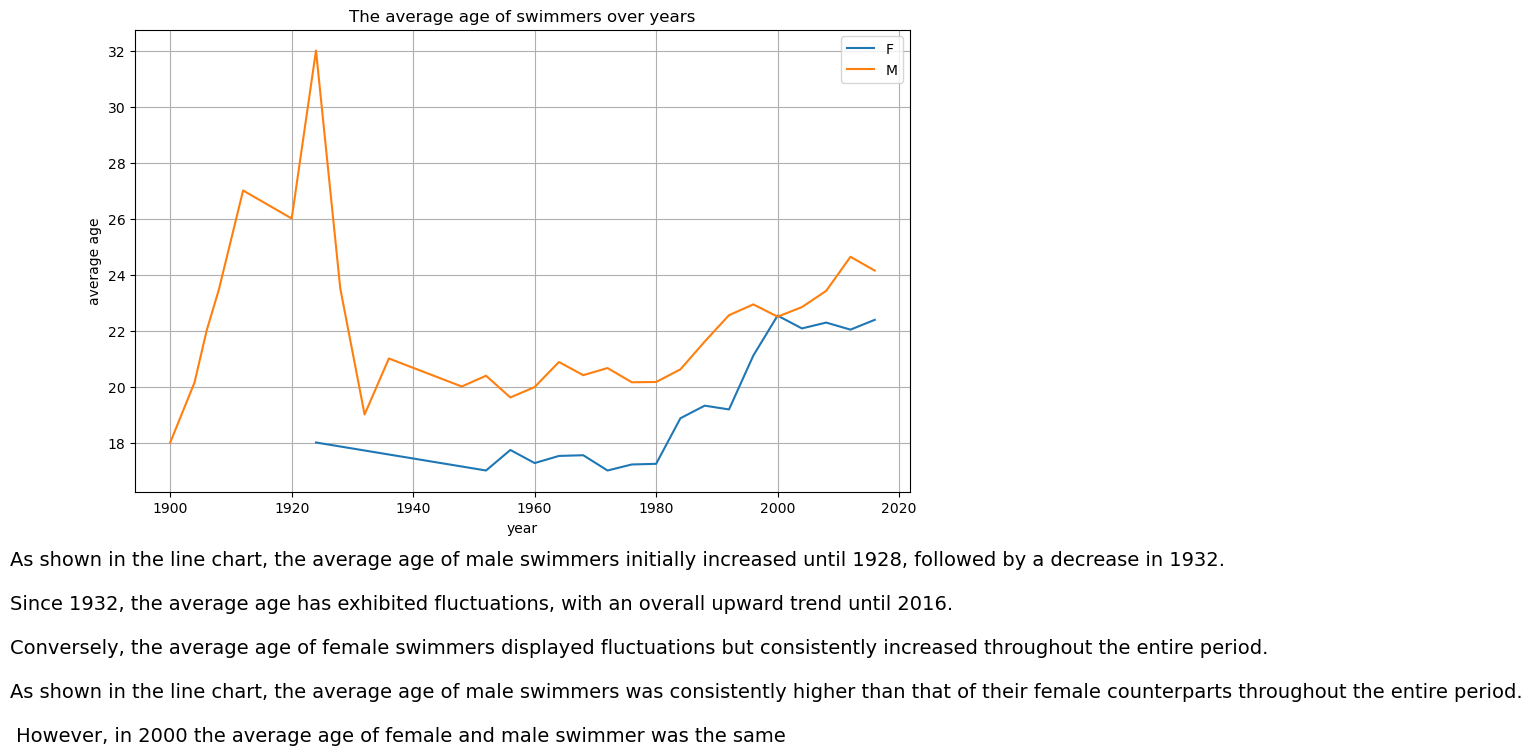




Number of Different Types of Medals Received by Females and Males: 

      medal              
medal Bronze Gold  Silver
sex                      
F      2578   2608  2604 
M      5367   5509  5184 


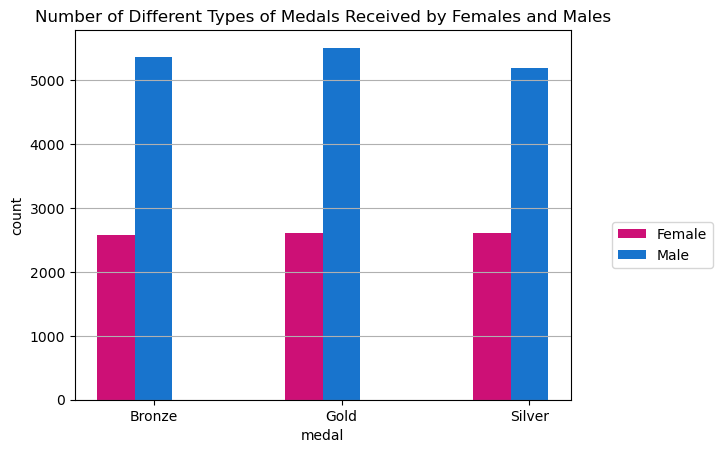

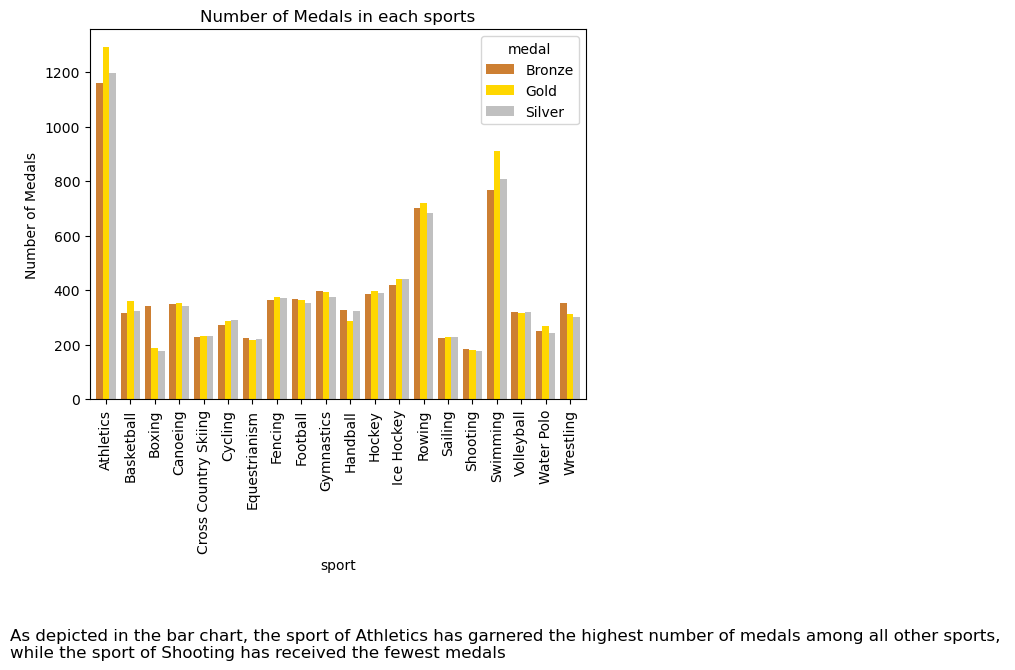

In [91]:
#Load the Dataset
import pandas as pd
task2= pd.read_table("task2.txt",sep=",")

#Q1
# the  95th percentile of heights for the competitors in all Athletic events for gender Female.
height_f_95th=np.quantile(task2.loc[((task2['sex']=='F')&
                       (task2['sport']=='Athletics')&
                       (task2['event']=="Athletics Women's 100 metres")),'height'],q=0.95)
print("\n")
print(f"95th percentile of heights for female athletes in Athletic events: {height_f_95th:.2f} cm")
print("\n")
#Q2
# the woman's event with the highest variability in height 
Female_Data=task2.loc[task2['sex']=='F',] #Female Dataset
max_std_value =Female_Data.groupby('event')['height'].std().max() #max std height group by based on event
event_with_highest_std = Female_Data.groupby('event')['height'].std().idxmax() #
print(f"The woman's event with the highest variability in height is '{event_with_highest_std}' with a standard deviation of {max_std_value:.2f} cm.")
print("\n")

#Q3
swimmers=task2.loc[task2['sport']=='Swimming'] #make a dataet for swimmers 
avg_age=swimmers.groupby(['sex','year'])['age'].mean() #group by mean age based on sex and year

#linear plot
plt.figure(figsize=(10, 6))
for i in ['F','M']:
    avg_age[i].plot(label=i)
    plt.ylabel('average age')
    plt.legend()
    plt.grid()
    plt.title('The average age of swimmers over years')

caption = (
    "As shown in the line chart, the average age of male swimmers initially increased until 1928, followed by a decrease in 1932. "
    "\n\nSince 1932, the average age has exhibited fluctuations, with an overall upward trend until 2016.\n\nConversely, the average age of female swimmers displayed fluctuations but consistently increased throughout the entire period. "
    "\n\nAs shown in the line chart, the average age of male swimmers was consistently higher than that of their female counterparts throughout the entire period."
    "\n\n However, in 2000 the average age of female and male swimmer was the same"
)

plt.text(0, -0.15, caption, ha='left', va='center',fontsize=14,transform=plt.gcf().transFigure)
plt.show()


# Q4 - Explore other things from Data
# compute the number of medals in each group of men and women

number_medal_by_gender = task2.groupby(['sex','medal'])['medal'].count() #count medal group by based on sex and type of medal
number_medal_by_gender=number_medal_by_gender.to_frame().unstack() #convert to data frame
print("\n\n")
print("Number of Different Types of Medals Received by Females and Males: \n")
print(number_medal_by_gender.to_string( justify='left', float_format='%.2f'))


#create a bar chart
x = np.arange(3) 
#bar chart for female
plt.bar(x-0.2, number_medal_by_gender.values[0],width=0.2, color='#CD1076') 

#bar chart for male
plt.bar(x, number_medal_by_gender.values[1],width=0.2, color='#1874CD') 

plt.xticks(x, ['Bronze', 'Gold', 'Silver']) 
plt.xlabel("medal") 
plt.ylabel("count") 
plt.title("Number of Different Types of Medals Received by Females and Males")
plt.legend(["Female", "Male"],bbox_to_anchor=(0.8, 0, 0.5, 0.5)) 
plt.grid(axis='y')
plt.show() 



# Number of Gold, Bronze and Silver Medal in each Sports
num_medal_by_sport = pd.crosstab(task2['sport'],task2['medal'])  
#bar Plot
print("\n\n")
num_medal_by_sport.plot.bar(color={'Bronze':'#CD7F32','Gold':'#FFD700','Silver':'#C0C0C0'}, width=0.8)
plt.title('Number of Medals in each sports')
plt.ylabel('Number of Medals')
caption2 = (
    "As depicted in the bar chart, the sport of Athletics has garnered the highest number of medals among all other sports, \nwhile the sport of Shooting has received the fewest medals"
)

plt.text(0, -0.4, caption2, ha='left', va='center',fontsize=12,transform=plt.gcf().transFigure)
plt.show()